**Objective**

The objective of this analysis is to explore and understand the sales patterns, customer behaviors, and product performance across different markets and time periods.

**Goal**

By conducting Exploratory Data Analysis (EDA), the goal is to uncover key insights that can guide strategic decisions for improving sales, optimizing pricing, and focusing marketing efforts on high-potential areas.

Created by: Amelia Ananda Setiawan

##### Import Library

In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Wrangling

This process has 3 steps: gathering data, assessing data, and cleaning data



#### Gathering Data
This data was sourced from the UCI Machine Learning, then uploaded to Google Sheets and coverted into CSV format to make it lighter.

In [329]:
sheet_id= '1oY-rbJP4DL8DOJOimkgKtz0BFBVzZaev'
url= f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv'
df = pd.read_csv(url)

#### Assesing Data
Summary:
The data contains missing values (null), duplicates, incorrect value (e.g., negative numbers), and cancelnation.



In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [331]:
df.isnull().sum()/len(df)*100

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.268311
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,24.926694
Country,0.000000


There are null in some columns
*  0.2% description
*  25% customer id




In [332]:
df.duplicated().sum()

5268

There are 5268 duplicate data

In [333]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


The minimum number of quantity and unit price is negative, therefore it needs to be corrected

#### Cleaning Data
Steps:
*   Copy the data for backup
*   Drop duplicate rows
*   Drop rows with missing values in the "CustomerID" columns
* Change "Quantity" to absolute values so the numbers are positive
* Change "Description" to lowercase for consistency
* Change "InvoiceDate" to date
* Create new column "year_month"
* Create new column (Amount) to track customer spending



In [334]:
# copy data
df_clean = df.copy()

In [335]:
# drop data duplicates
df_clean = df.drop_duplicates(inplace=True)

In [336]:
# drop data with a null or missing value customer id
df_clean = df.dropna(subset=['CustomerID'])

In [337]:
# change quantity column to absolute
df_clean.loc[:,'Quantity'] = df_clean['Quantity'].abs()

In [338]:
# change description column to lower
df_clean.loc[:,'Description'] = df_clean['Description'].str.lower()

In [339]:
# change InvoiceDate column to datetime
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'], format='%m/%d/%y %H:%M', errors='coerce')

<ipython-input-339-05a3ea8c31a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'], format='%m/%d/%y %H:%M', errors='coerce')


In [340]:
df_clean['Date'] = df_clean['InvoiceDate'].dt.date
df_clean['year_month'] = df_clean['InvoiceDate'].dt.to_period('M')

<ipython-input-340-a14ac9526cce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Date'] = df_clean['InvoiceDate'].dt.date
<ipython-input-340-a14ac9526cce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['year_month'] = df_clean['InvoiceDate'].dt.to_period('M')


In [341]:
# create a new column (amount) by multiplying quantity with unit price
df_clean.loc[:,'Amount'] = df_clean.loc[:,'Quantity'] * df_clean.loc[:,'UnitPrice']

<ipython-input-341-5f28112ec5ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:,'Amount'] = df_clean.loc[:,'Quantity'] * df_clean.loc[:,'UnitPrice']


In [342]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   Date         401604 non-null  object        
 9   year_month   401604 non-null  period[M]     
 10  Amount       401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5), period[M](1)
memory usage: 36.8+ MB


### Exploratory Data Analysis (EDA)

##### Overview
* The dataset contains 401k transactions with 4372 unique customers
* Total sales reached 9.4 Mio with 5.4 Mio units sold, and the average unit price is 3.4
* There is a strong positive correlation (92%) between quantity and amount, indicating that highest quantities lead to higher total sales
* The correlation between quantity and unit price is 17%, suggesting a weaker relationship between unit price and quantity sold

In [343]:
df_clean.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,year_month,Amount
count,401604,401604,401604,401604.000000,401604,401604.000000,401604.000000,401604,401604,401604,401604.000000
unique,22190,3684,3896,NaN,NaN,NaN,NaN,37,305,13,NaN
top,576339,85123A,white hanging heart t-light holder,NaN,NaN,NaN,NaN,United Kingdom,2011-12-05,2011-11,NaN
freq,542,2065,2058,NaN,NaN,NaN,NaN,356728,3359,64232,NaN
mean,NaN,NaN,NaN,13.542995,2011-07-10 12:08:23.848567552,3.474064,15281.160818,NaN,NaN,NaN,23.644930
min,NaN,NaN,NaN,1.000000,2010-12-01 08:26:00,0.000000,12346.000000,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,2.000000,2011-04-06 15:02:00,1.250000,13939.000000,NaN,NaN,NaN,4.950000
50%,NaN,NaN,NaN,6.000000,2011-07-29 15:40:00,1.950000,15145.000000,NaN,NaN,NaN,11.900000
75%,NaN,NaN,NaN,12.000000,2011-10-20 11:58:30,3.750000,16784.000000,NaN,NaN,NaN,19.800000
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN,NaN,NaN,168469.600000


In [344]:
df_clean['Amount'].sum()

9495898.364

In [345]:
df_clean['Quantity'].sum()

5438921

In [346]:
df_clean['CustomerID'].nunique()

4372

<Axes: >

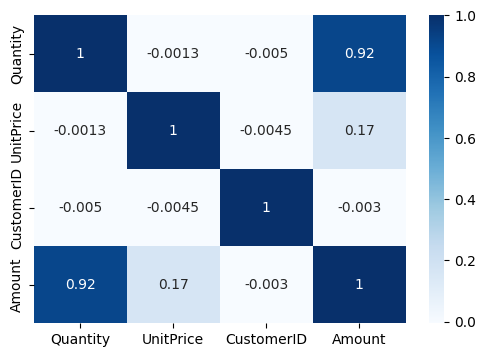

In [347]:
numeric = df_clean.select_dtypes(include=[np.number])
plt.figure(figsize=(6,4))
sns.heatmap(numeric.corr(), cmap='Blues', annot=True)

##### Based on Country
* The United Kingdom leads sales with 82% market share, reaching 7.8 Mio
* Despite the Netherlands having the highest quantity with 20k units, the market share difference with Eire is only 0.05%, as Eire has a higher unit price (5) compared to the Netherlands (2.7).

In [348]:
pivot_country = pd.pivot_table(df_clean, index='Country',
               values=['Quantity', 'UnitPrice','Amount'],
               aggfunc={'Quantity':np.sum, 'UnitPrice':np.mean, 'Amount':np.sum},
               fill_value=0)
total_amount = pivot_country['Amount'].sum()
pivot_country['Market_Share(%)'] = (pivot_country['Amount']/total_amount)*100
pivot_country = pivot_country.sort_values(by="Amount", ascending=False)
pivot_country.head(10)

<ipython-input-348-76b9e55c9a12>:1: FutureWarning: The provided callable <function sum at 0x7d4d2a5f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_country = pd.pivot_table(df_clean, index='Country',
<ipython-input-348-76b9e55c9a12>:1: FutureWarning: The provided callable <function mean at 0x7d4d2a5f55a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_country = pd.pivot_table(df_clean, index='Country',
<ipython-input-348-76b9e55c9a12>:1: FutureWarning: The provided callable <function sum at 0x7d4d2a5f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_country = pd.pivot_table(df_clean, index=

,Amount,Quantity,UnitPrice,Market_Share(%)
Country,,,,
United Kingdom,7822893.134,4513204,3.268255,82.381812
Netherlands,286231.140,201746,2.738317,3.014261
EIRE,280523.140,144579,5.111607,2.954151
Germany,235847.330,120971,3.969772,2.483676
France,221242.570,113052,5.053124,2.329875
Australia,139897.850,84755,3.217806,1.473245
Spain,68361.090,29071,4.992682,0.719901
Switzerland,57148.500,30388,3.499521,0.601823
Belgium,41481.720,23322,3.644335,0.436838


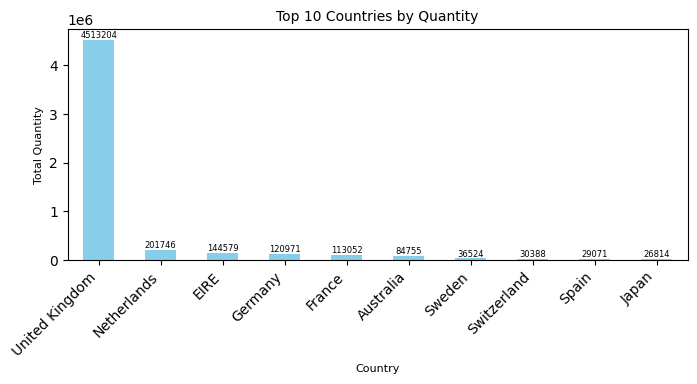

In [349]:
top10_country = pivot_country.sort_values(by='Quantity', ascending=False).head(10)

plt.figure(figsize=(8,3))
top10_country['Quantity'].plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Quantity', fontsize=10)
plt.xlabel('Country', fontsize=8)
plt.ylabel('Total Quantity', fontsize=8)

for i, v in enumerate(top10_country['Quantity']):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=6)

plt.xticks(rotation=45, ha='right')
plt.show()

##### Based on Product Name / Description
* Paper Craft Little Birdie is the top-selling product in both quantity (161k units) and total sales (336k).
* Based on quantity, Medium Ceramic Top Storage Jar ranks second with 152k units, but based on total value, Manual surpassed it with a 1.7% market share, thanks to a higher average unit price.

In [350]:
pivot_description = pd.pivot_table(df_clean, index='Description',
               values=['Quantity', 'UnitPrice','Amount'],
               aggfunc={'Quantity':np.sum, 'UnitPrice':np.mean, 'Amount':np.sum},
               fill_value=0)
pivot_description['Market_Share(%)'] = (pivot_description['Amount']/total_amount)*100
pivot_description.sort_values(by="Quantity", ascending=False).head(10)

<ipython-input-350-768920437b5a>:1: FutureWarning: The provided callable <function sum at 0x7d4d2a5f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_description = pd.pivot_table(df_clean, index='Description',
<ipython-input-350-768920437b5a>:1: FutureWarning: The provided callable <function mean at 0x7d4d2a5f55a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_description = pd.pivot_table(df_clean, index='Description',
<ipython-input-350-768920437b5a>:1: FutureWarning: The provided callable <function sum at 0x7d4d2a5f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_description = pd.pivot_ta

,Amount,Quantity,UnitPrice,Market_Share(%)
Description,,,,
"paper craft , little birdie",336939.20,161990,2.080000,3.548260
medium ceramic top storage jar,158896.37,152410,1.217692,1.673316
world war 2 gliders asstd designs,13812.33,55519,0.292034,0.145456
jumbo bag red retrospot,87024.56,47193,2.013140,0.916444
white hanging heart t-light holder,107016.40,39284,2.891020,1.126975
assorted colour bird ornament,56494.15,35311,1.680776,0.594932
pack of 72 retrospot cake cases,16528.46,33954,0.547957,0.174059
popcorn holder,23746.92,31346,0.841132,0.250076
rabbit night light,51459.64,27261,2.012936,0.541914


In [351]:
pivot_description.sort_values(by="Amount", ascending=False).head(10)

,Amount,Quantity,UnitPrice,Market_Share(%)
Description,,,,
"paper craft , little birdie",336939.20,161990,2.080000,3.548260
manual,165585.32,10934,338.044391,1.743756
medium ceramic top storage jar,158896.37,152410,1.217692,1.673316
regency cakestand 3 tier,151961.80,13239,12.428511,1.600289
white hanging heart t-light holder,107016.40,39284,2.891020,1.126975
postage,88897.68,3238,37.888528,0.936169
jumbo bag red retrospot,87024.56,47193,2.013140,0.916444
party bunting,69942.03,15551,4.870625,0.736550
assorted colour bird ornament,56494.15,35311,1.680776,0.594932


##### Based on Time
* Overall, sales showed a fluctuating trend, with an increase starting in Sept 2011, reaching 972k in total sales, then dropping to 692k by Dec 2011.
* Despite the decline, Des 9th, 2011, marked the highest sales day, with 171k units sold.

In [352]:
pivot_month = df_clean.groupby('year_month').agg({
    'Quantity': 'sum',
    'Amount': 'sum',
    'InvoiceNo': 'count'
}).rename(columns={'InvoiceNo': 'Count'})
pivot_month['Market_Share(%)'] = (pivot_month['Amount']/total_amount)*100

pivot_month.sort_values(by="year_month", ascending=True)

,Quantity,Amount,Count,Market_Share(%)
year_month,,,,
2010-12,326949,588472.600,26354,6.197124
2011-01,428289,662470.720,21670,6.976388
2011-02,267843,456635.770,20138,4.808769
2011-03,352151,609587.310,27516,6.419480
2011-04,305008,511525.991,22988,5.386810
2011-05,378781,707698.630,28661,7.452677
2011-06,369789,713229.580,27576,7.510923
2011-07,373385,624813.481,27256,6.579825
2011-08,410515,673023.990,27444,7.087523


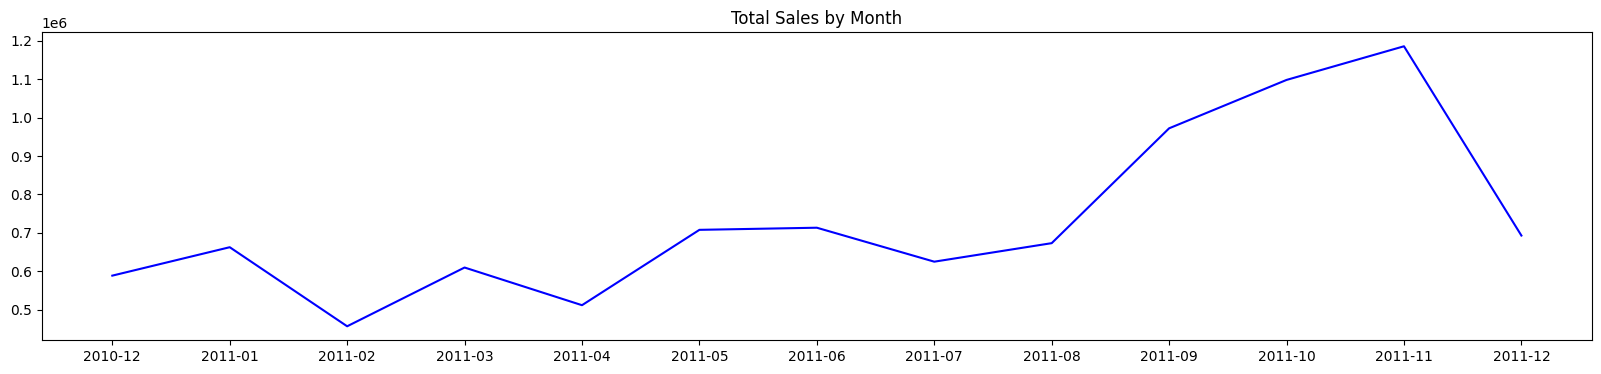

In [353]:
plt.figure(figsize=(20, 4))
plt.title("Total Sales by Month")

# Convert the Period index to string
plt.plot(pivot_month.astype(str).index.astype(str), pivot_month['Amount'], color='blue', linestyle='-')

plt.show()

In [354]:
pivot_date = df_clean.groupby('Date').agg({
    'Quantity': 'sum',
    'Amount': 'sum',
    'InvoiceNo': 'count'
}).rename(columns={'InvoiceNo': 'Count'})
pivot_date['Market_Share(%)'] = (pivot_date['Amount']/total_amount)*100

pivot_date.sort_values(by="Quantity", ascending=False).head(10)

,Quantity,Amount,Count,Market_Share(%)
Date,,,,
2011-12-09,171582,353118.73,617,3.718645
2011-01-18,154841,164825.76,531,1.735757
2011-10-05,46031,74324.77,2178,0.782704
2011-09-20,42615,103428.23,1430,1.089188
2011-08-04,42410,66547.75,1502,0.700805
2010-12-02,41364,48738.67,2003,0.513260
2011-12-07,41119,69593.54,2164,0.732880
2011-10-20,40950,61240.06,2292,0.644911
2011-11-09,38864,64769.72,2159,0.682081


##### Based on Customer
Customer ID 1664 had the highest spending, totalling 336k

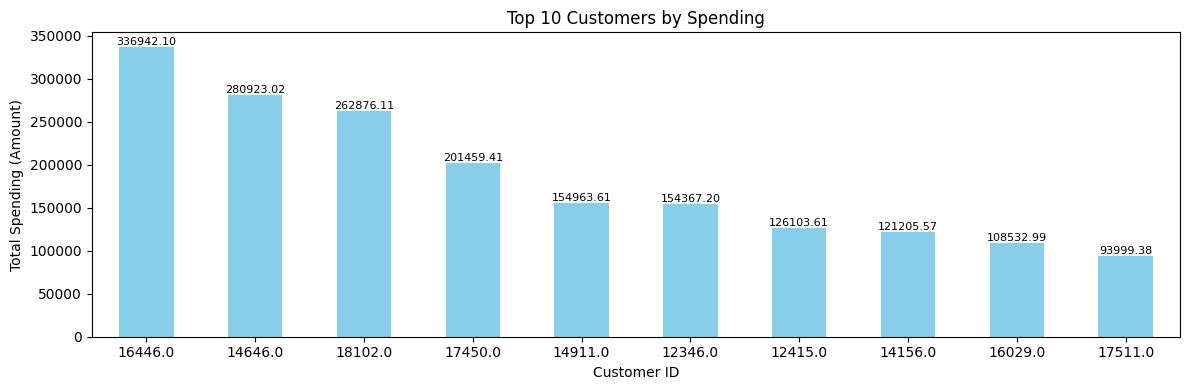

In [355]:
plt.figure(figsize=(12, 4))
top_customers = df_clean.groupby('CustomerID')['Amount'].sum().sort_values(ascending=False).head(10)

top_customers.plot(kind='bar',
                   title='Top 10 Customers by Spending',
                   color='skyblue',
                   fontsize=10)

for i, v in enumerate(top_customers):
    plt.text(i, v + 10, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

plt.xlabel('Customer ID', fontsize=10)
plt.ylabel('Total Spending (Amount)', fontsize=10)
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

##### Deep Dive United Kingdom
* In the United Kingdom, Paper Craft Little Birdie is the top-selling product, with 161k units sold.
* Medium Ceramic ranks second with total sales of 157k.
* Sales in the UK also fluctuative, with Nov 2011 being the highest month, securing 999k in sales.
* Looking at the daily data, Dec 12, 2011, is the highest sales day, matching the overall trend

In [356]:
df_uk = df_clean.loc[df_clean["Country"] == "United Kingdom"]

In [357]:
pivot_description_uk = pd.pivot_table(df_uk, index='Description',
               values=['Quantity', 'UnitPrice', 'Amount'],
               aggfunc={'Quantity': np.sum, 'UnitPrice': np.mean, 'Amount': np.sum},
               fill_value=0)

total_amount_uk = pivot_description_uk['Amount'].sum()
pivot_description_uk['Market_Share(%)'] = (pivot_description_uk['Amount'] / total_amount_uk) * 100

pivot_description_uk = pivot_description_uk.sort_values(by="Quantity", ascending=False)

pivot_description_uk.head(10)

<ipython-input-357-4895add73c9e>:1: FutureWarning: The provided callable <function sum at 0x7d4d2a5f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_description_uk = pd.pivot_table(df_uk, index='Description',
<ipython-input-357-4895add73c9e>:1: FutureWarning: The provided callable <function mean at 0x7d4d2a5f55a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_description_uk = pd.pivot_table(df_uk, index='Description',
<ipython-input-357-4895add73c9e>:1: FutureWarning: The provided callable <function sum at 0x7d4d2a5f4670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_description_uk = pd.pivot

,Amount,Quantity,UnitPrice,Market_Share(%)
Description,,,,
"paper craft , little birdie",336939.20,161990,2.080000,4.307092
medium ceramic top storage jar,157737.75,151386,1.224615,2.016361
world war 2 gliders asstd designs,12363.88,50286,0.292634,0.158047
jumbo bag red retrospot,79146.23,42979,2.013129,1.011726
white hanging heart t-light holder,101350.15,37181,2.892214,1.295558
assorted colour bird ornament,52309.80,32676,1.681519,0.668676
popcorn holder,22134.42,29296,0.841526,0.282944
pack of 12 london tissues,6936.81,24345,0.325668,0.088673
pack of 72 retrospot cake cases,11122.98,22702,0.551084,0.142185


In [358]:
pivot_description_uk.sort_values(by="Amount", ascending=False).head(10)

,Amount,Quantity,UnitPrice,Market_Share(%)
Description,,,,
"paper craft , little birdie",336939.20,161990,2.080000,4.307092
medium ceramic top storage jar,157737.75,151386,1.224615,2.016361
regency cakestand 3 tier,118554.85,10308,12.467807,1.515486
white hanging heart t-light holder,101350.15,37181,2.892214,1.295558
manual,94897.29,10353,235.276000,1.213072
jumbo bag red retrospot,79146.23,42979,2.013129,1.011726
party bunting,64207.08,14252,4.874742,0.820759
assorted colour bird ornament,52309.80,32676,1.681519,0.668676
chilli lights,45833.61,9574,5.424167,0.585891


In [359]:
pivot_month_uk = df_uk.groupby('year_month').agg({
    'Quantity': 'sum',
    'Amount': 'sum',
    'InvoiceNo': 'count'
}).rename(columns={'InvoiceNo': 'Count'})

pivot_month_uk.sort_values(by="year_month", ascending=True)

,Quantity,Amount,Count
year_month,,,
2010-12,281504,511279.450,24043
2011-01,357041,531083.860,18497
2011-02,214670,361379.850,17886
2011-03,279462,476034.310,24283
2011-04,272128,441546.991,21148
2011-05,306844,576354.820,25494
2011-06,286653,576164.820,24039
2011-07,307177,509008.291,23930
2011-08,318996,518636.870,23412


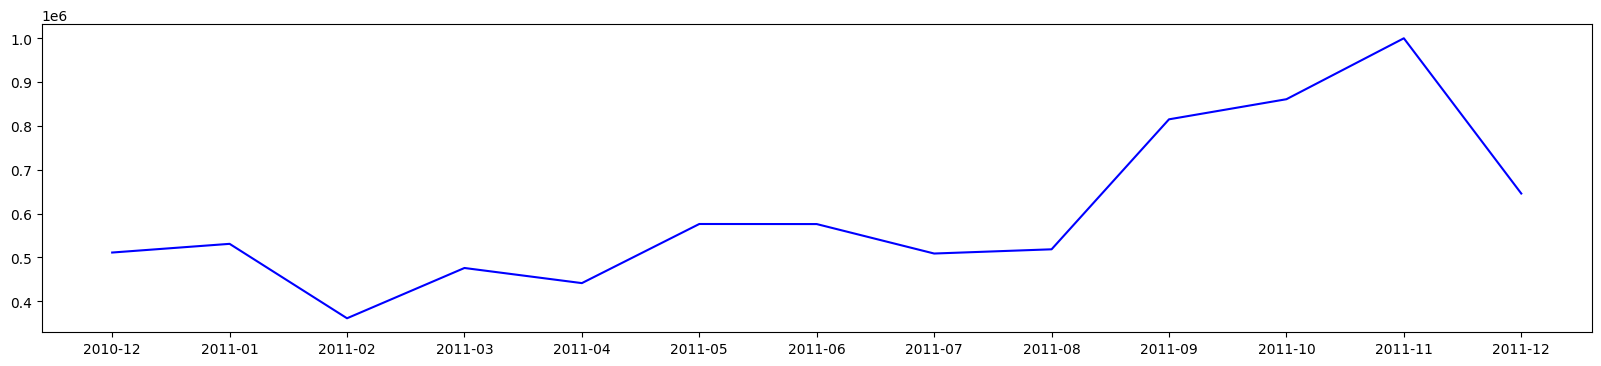

In [360]:
plt.figure(figsize=(20,4))
plt.plot(pivot_month_uk.astype(str).index.astype(str), pivot_month_uk['Amount'], color='blue', linestyle='-')
plt.show()

In [361]:
pivot_date_uk = df_uk.groupby('Date').agg({
    'Quantity': 'sum',
    'Amount': 'sum',
    'InvoiceNo': 'count'
}).rename(columns={'InvoiceNo': 'Count'})

pivot_date_uk.sort_values(by="Quantity", ascending=False).head(10)

,Quantity,Amount,Count
Date,,,
2011-12-09,168167,348332.23,437
2011-01-18,152931,161274.99,446
2010-12-02,41206,48536.32,1988
2011-09-20,41083,100431.95,1259
2011-11-09,37695,62407.91,2076
2011-12-05,36673,56106.90,3228
2011-08-04,35502,53767.34,1269
2011-10-06,33689,59983.08,2327
2011-10-05,32754,47222.47,1662


### Next Actions

1. **Focus on the United Kingdom Market**

  With 82% market share, prioritize marketing and distribution in the UK while expanding awareness in potential markets like Netherlands, Eire, and Germany.

2. **Pricing Strategy**

  Leverage premium pricing in markets like Eire, where higher prices drive greater market share, even with fewer units sold.

3. **Focus on Best-Selling Product**

  Focus on best-sellers like Paper Craft Little Birdie (161k units) and consider adding similar product variations.
  
4. **Optimized Sales Based on Seasonal Trends**

  * Capitalize on sales spikes in September and November 2011 by planning major campaigns during peak months.
  * Investigate sales spikes on dates like December 5 and 12, 2011, to understand if they were driven by promotions or other factors.